# Regresión lineal para predicción de progresión de diabetes
- age: Representa la edad del paciente, normalizada (no es la edad real, sino una representación estandarizada).
- sex: Sexo del paciente, representado como una variable numérica normalizada (valores entre -0.5 y 0.5).
- bmi: Índice de Masa Corporal (Body Mass Index, BMI), una medida del peso relativo al cuadrado de la altura.
- bp:
Promedio de presión arterial (Blood Pressure, BP), normalizada.
- s1: Nivel sérico de lípidos totales (colesterol total).
- s2: Nivel sérico de lipoproteínas de baja densidad (LDL, “colesterol malo”).
- s3: Nivel sérico de lipoproteínas de alta densidad (HDL, “colesterol bueno”).
- s4: Relación entre el colesterol total y HDL.
- s5: Nivel sérico de triglicéridos, representado como una medida numérica normalizada.
- s6: Nivel sérico de glucosa en ayuno, una medida clave en el monitoreo de la diabetes.

In [1]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

# Cargar el conjunto de datos
diabetes_data = load_diabetes()

# Convertir el conjunto de datos a un DataFrame para facilitar su manipulación
df = pd.DataFrame(data=diabetes_data.data, columns=diabetes_data.feature_names)
df['target'] = diabetes_data.target  # Agregar la variable objetivo al DataFrame

# Mostrar las primeras filas del DataFrame
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [2]:
# ==========================================
# Regresión Lineal: Predicción de progresión de la diabetes
# ==========================================
# Objetivo:
# Construir un modelo de regresión lineal que prediga la progresión de la diabetes
# un año después, utilizando características médicas como variables de entrada.
# Este modelo permitirá analizar cómo los factores médicos impactan en la progresión
# de la enfermedad.
# ==========================================

# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ==========================================
# 1. Cargar y explorar el conjunto de datos
# ==========================================

diabetes_data = load_diabetes()

df = pd.DataFrame(data=diabetes_data.data, columns=diabetes_data.feature_names)
df['target'] = diabetes_data.target

# Mostrar las primeras filas
print("Primeras filas del conjunto de datos:")
display(df.head())

# Información general
print("\nInformación del DataFrame:")
print(df.info())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
display(df.describe())










Primeras filas del conjunto de datos:


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0



Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None

Estadísticas descriptivas:


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


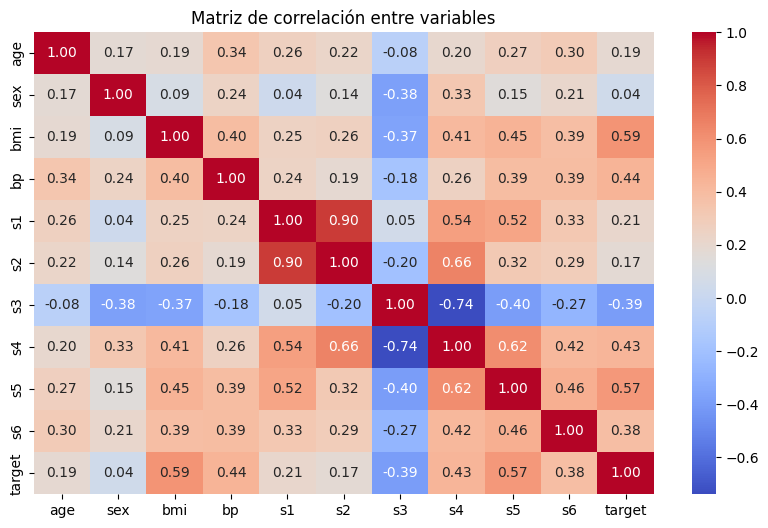

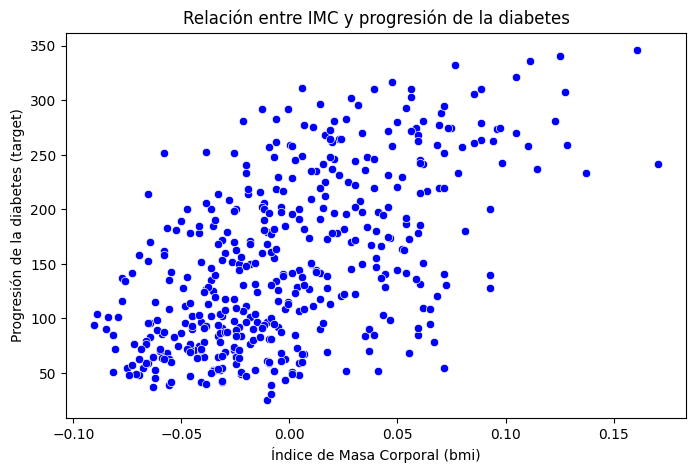

In [3]:
# ==========================================
# 2. Análisis exploratorio y visualización
# ==========================================

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación entre variables")
plt.show()

# Relación entre IMC (bmi) y progresión de la diabetes
plt.figure(figsize=(8, 5))
sns.scatterplot(x='bmi', y='target', data=df, color='blue')
plt.title('Relación entre IMC y progresión de la diabetes')
plt.xlabel('Índice de Masa Corporal (bmi)')
plt.ylabel('Progresión de la diabetes (target)')
plt.show()


In [4]:
# ==========================================
# 3. Separación de datos en entrenamiento y prueba
# ==========================================

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} muestras")

Tamaño del conjunto de entrenamiento: 353 muestras
Tamaño del conjunto de prueba: 89 muestras


In [5]:
# ==========================================
# 4. Entrenamiento del modelo de regresión lineal
# ==========================================

model = LinearRegression()
model.fit(X_train, y_train)

# Coeficientes y término independiente
coeficientes = pd.DataFrame(model.coef_, X.columns, columns=['Coeficiente'])
intercepto = model.intercept_

print("\nCoeficientes del modelo:")
display(coeficientes)
print(f"\nIntercepto: {intercepto:.4f}")


Coeficientes del modelo:


,Coeficiente
age,37.904021
sex,-241.964362
bmi,542.428759
bp,347.703844
s1,-931.488846
s2,518.062277
s3,163.419983
s4,275.317902
s5,736.198859
s6,48.670657



Intercepto: 151.3456


In [6]:
# ==========================================
# 5. Evaluación del modelo
# ==========================================

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nEvaluación del modelo:")
print(f"MAE (Error Absoluto Medio): {mae:.2f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.2f}")
print(f"R² (Coeficiente de determinación): {r2:.2f}")


Evaluación del modelo:
MAE (Error Absoluto Medio): 42.79
RMSE (Raíz del Error Cuadrático Medio): 53.85
R² (Coeficiente de determinación): 0.45


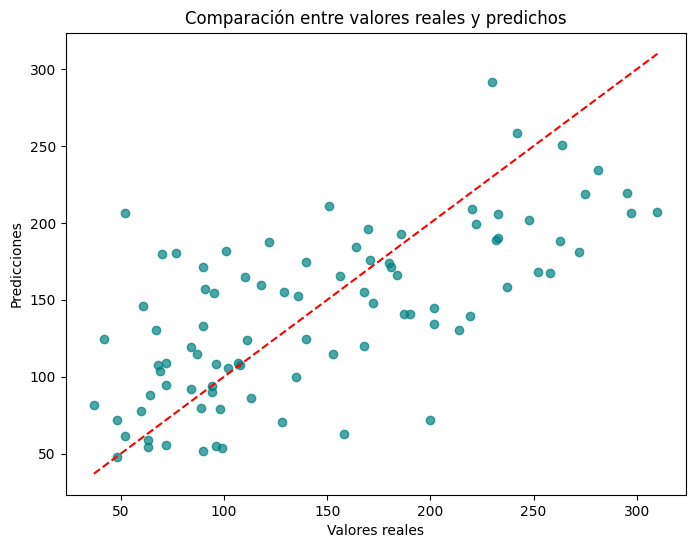

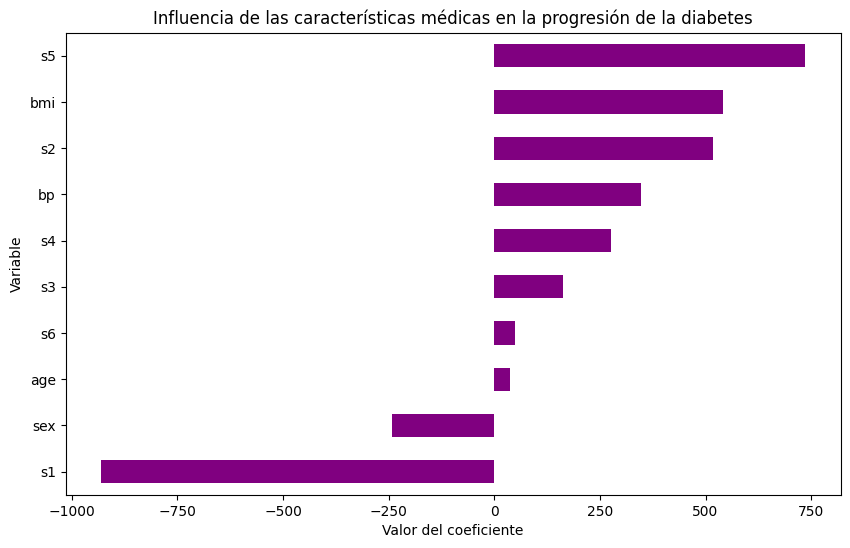

In [7]:
# ==========================================
# 6. Visualización de resultados y conclusiones
# ==========================================

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='teal', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Comparación entre valores reales y predichos')
plt.show()

# Importancia de las variables (magnitud del coeficiente)
plt.figure(figsize=(10, 6))
coeficientes['Coeficiente'].sort_values().plot(kind='barh', color='purple')
plt.title('Influencia de las características médicas en la progresión de la diabetes')
plt.xlabel('Valor del coeficiente')
plt.ylabel('Variable')
plt.show()

# ==========================================
# Conclusión
# ==========================================
# El modelo de regresión lineal permite estimar cómo distintas características médicas
# (como el IMC, la presión arterial y los niveles de glucosa) influyen en la progresión
# de la diabetes un año después. Aunque el modelo es simple, proporciona una primera
# aproximación útil para entender las relaciones entre las variables clínicas y la
# evolución de la enfermedad.
